In [24]:
import seaborn as sns
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import LabelEncoder
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import accuracy_score

In [25]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

In [26]:
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

In [27]:
# Initialize the LabelEncoder
le = LabelEncoder()

In [28]:
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

In [29]:
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [30]:
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis =1)

In [31]:
X = df_filtered.drop(columns=["species"])
X = pd.get_dummies(X, drop_first=True)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)


Train the logistic regression model . Here we are using saga solver to learn weights .


In [33]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [34]:
# Predict on the testing data
y_pred = logreg.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy : 1.0
[[ 1.32621379 -1.25548308 -0.12756343 -0.00312309  1.24947049  0.7210066
  -0.55671955 -0.22369071]] [-0.08354891]


In [37]:
random_states = [0, 1, 42, 100, 2025]

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=random_state)
    logreg = LogisticRegression(solver='saga')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy :", accuracy)     

Accuracy : 0.6511627906976745
Accuracy : 0.7209302325581395
Accuracy : 0.5813953488372093
Accuracy : 0.6744186046511628
Accuracy : 0.6511627906976745


c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg_saga_scaled = LogisticRegression(solver="saga")
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)
print("Accuracy (Saga with scaling): ", accuracy_saga_scaled)

logreg_liblinear_scaled = LogisticRegression(solver="liblinear")
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)
print("Accuracy (liblinear with scaling): ", accuracy_liblinear_scaled)

Accuracy (Saga with scaling):  1.0
Accuracy (liblinear with scaling):  1.0


In [39]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs

In [40]:
# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [5 , 1.5]]

In [41]:
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5 , 0.5], [ -0.5 , 1.5]]
X = np.dot(X, transformation)

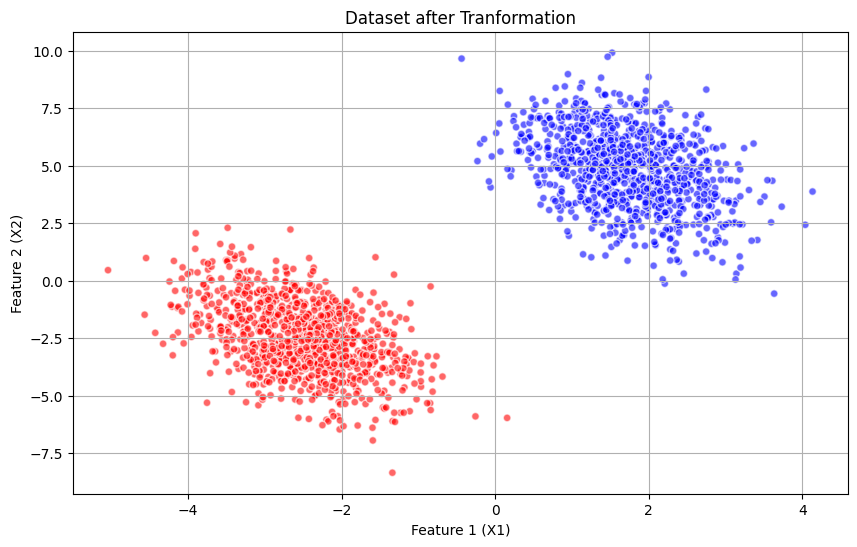

In [43]:
plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=30)
plt.title('Dataset after Tranformation')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.grid(True)
plt.show()